<a href="https://colab.research.google.com/github/edatkinson/Prohibited-Item-Detection/blob/main/AiIntro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torchvision
import os
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
#torch.manual_seed(0)
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
drive.mount('/content/drive')

root_dir = '/content/drive/MyDrive/Datasets/split_classes/split_classes'

# Check whether we have a GPU.  Use it if we do.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_transform = transforms.Compose([transforms.Resize([256,256]), transforms.ToTensor()])

test_transform = transforms.Compose([transforms.Resize([256,256]) ,transforms.ToTensor()])

augmentation_class = transforms.Compose(

class CustomDataset(ImageFolder):
  def __init__(self, root, transform=None):
    super().__init__(root=root, transform=transform)#, target_transform, loader, is_valid_file)
  def __getitem__(self, index):
    image, label = super().__getitem__(index)
    label = self.classes.index(self.classes[label])
    return image , label

train_dataset = CustomDataset(root=os.path.join(root_dir,'train'),transform = train_transform)
test_dataset = CustomDataset(root=os.path.join(root_dir,'test'),transform=test_transform)

train_loader = DataLoader(dataset=train_dataset,
                                           batch_size=50,
                                           shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=75, shuffle= True)



def imshow(img):
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
#dataiter = iter(train_loader)
#images, labels = next(dataiter)

# show images
#imshow(torchvision.utils.make_grid(images))
#print(labels)
#print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))








Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
input_size = 256*256
hidden_size = 500
num_classes = 3

model = nn.Sequential(
    nn.Conv2d(in_channels=3, out_channels=100, kernel_size=3, padding=1),  #Output shape is [N, 100, H, W]
    nn.ReLU(),                                                             #Output shape is [N, 100, H, W]
    nn.Conv2d(in_channels=100, out_channels=10, kernel_size=3, padding=1), #Output shape is [N,  10, H, W]
    nn.ReLU(),                                                             #Output shape is [N, 100, H, W]
    nn.Conv2d(in_channels=10, out_channels=3, kernel_size=3, padding=1),
    nn.AdaptiveAvgPool2d(1)                                                #output shape is [N,  10, 1, 1]; does global average pooling
).to(device)

#################################
#### Tweak the optimizer !!! ####
#################################
opt = torch.optim.SGD(model.parameters(), lr=0.1)

def train():
    # Does one training epoch (i.e. one pass over the data.)
    for images, labels in train_loader:
        # Move tensors to the configured device, and convert image to vector.
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        logits = model(images).squeeze((-1, -2)) #output shape is [N, 10]

        # Backpropagation and optimization
        loss = nn.functional.cross_entropy(logits, labels)
        loss.backward()
        opt.step()
        opt.zero_grad()

def test(epoch):
    # Do one pass over the test data.
    # In the test phase, don't need to compute gradients (for memory efficiency)
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            #Convert image pixels to vector
            images = images.to(device)
            labels = labels.to(device)

            # Forward pass
            logits = model(images).squeeze((-1, -2))

            # Compute total correct so far
            predicted = torch.argmax(logits, -1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
        print(f'Test accuracy after {epoch+1} epochs: {correct} correct out of {total} total ')


# Run training
for epoch in range(5):
    train()
    test(epoch)


Test accuracy after 1 epochs: 635 correct out of 685 total 
Test accuracy after 2 epochs: 635 correct out of 685 total 
Test accuracy after 3 epochs: 635 correct out of 685 total 
Test accuracy after 4 epochs: 635 correct out of 685 total 
Test accuracy after 5 epochs: 635 correct out of 685 total 


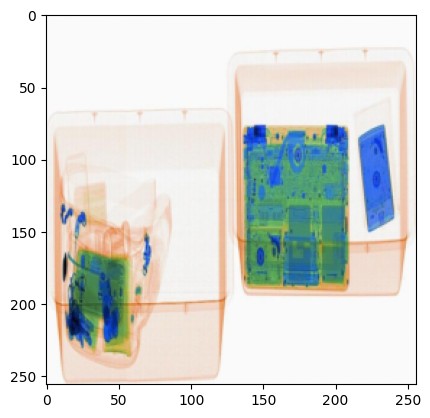

tensor([[[-1.1607]],

        [[-0.8938]],

        [[ 1.5290]]], device='cuda:0', grad_fn=<MeanBackward1>)
tensor([-1.1607, -0.8938,  1.5290], device='cuda:0',
       grad_fn=<SqueezeBackward2>)
tensor(2, device='cuda:0')
tensor(2)
['Baton', 'Bullet', 'Null']


In [ ]:

def imshow(img):
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
#images,label = test_loader
# get some random training images
dataiter = iter(test_loader)
images, labels = next(dataiter)
#images = images.to(device)
imshow(torchvision.utils.make_grid(images[0]))
images = images.to(device)
print(model(images[0]))
logits = model(images[0]).squeeze((-1, -2))
print(logits)
predicted = torch.argmax(logits, -1)
print(predicted)
print(labels[0])


class_names = train_loader.dataset.classes
print(class_names)


tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])


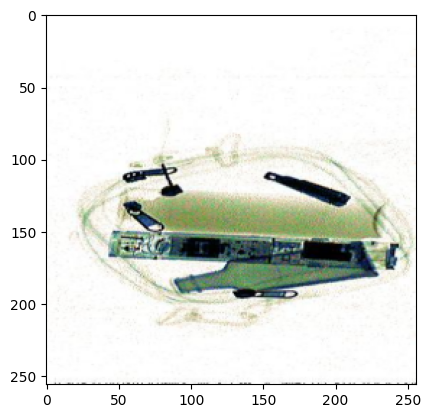

In [ ]:
print(labels)
dataiter = iter(test_loader)
images, labels = next(dataiter)
BatImages = [images[i] for i in range(len(images)) if labels[i]==0]
imshow(torchvision.utils.make_grid(BatImages[3]))